<a href="https://colab.research.google.com/github/Abhiram-k1/Elevate-Labs-AI-ML-Internship/blob/main/Elevate_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male 

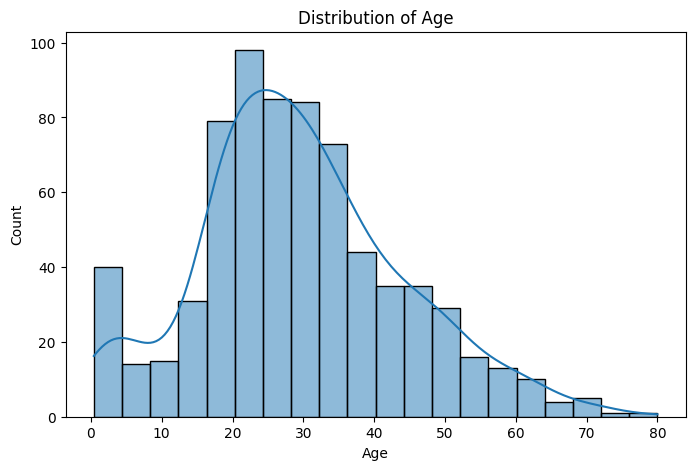

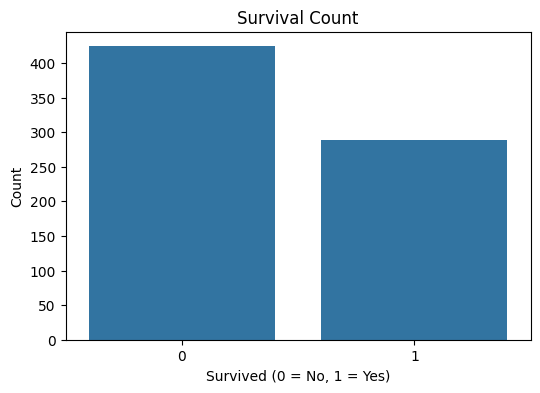

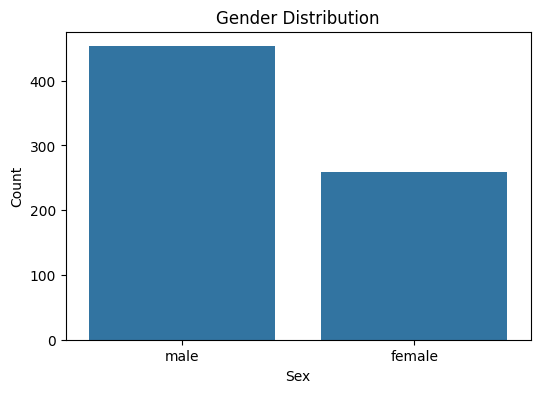

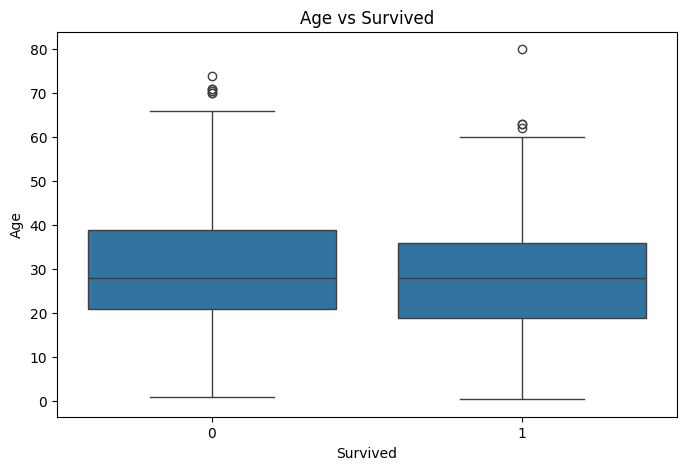

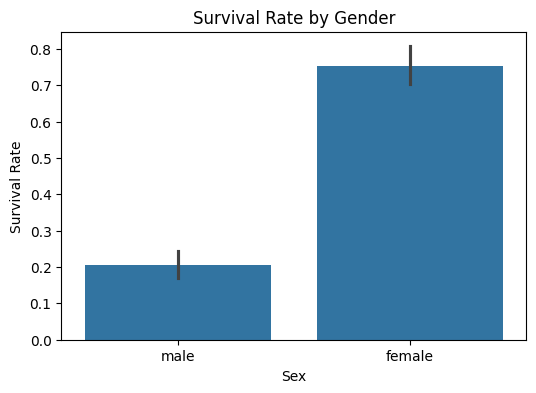

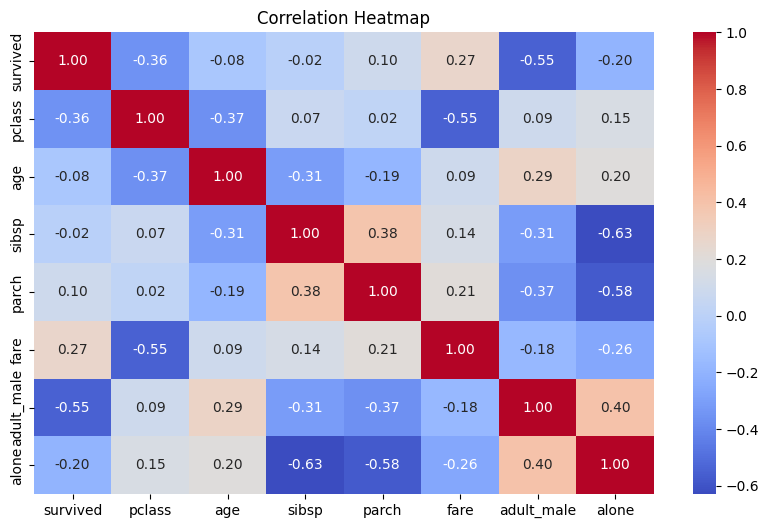


Encoded dataframe:
    survived  pclass   age  sibsp  parch     fare  embark_town alive  sex_male  \
0         0       3  22.0      1      0   7.2500  Southampton    no      True   
1         1       1  38.0      1      0  71.2833    Cherbourg   yes     False   
2         1       3  26.0      0      0   7.9250  Southampton   yes     False   
3         1       1  35.0      1      0  53.1000  Southampton   yes     False   
4         0       3  35.0      0      0   8.0500  Southampton    no      True   

   embarked_Q  embarked_S  class_Second  class_Third  who_man  who_woman  \
0       False        True         False         True     True      False   
1       False       False         False        False    False       True   
2       False        True         False         True    False       True   
3       False        True         False        False    False       True   
4       False        True         False         True     True      False   

   adult_male_True  alone_True  
0 

In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Display first few rows
print(df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop columns with too many missing values (e.g., 'deck')
df.drop(columns=['deck'], inplace=True)

# Drop rows with missing 'Age' or 'Embarked'
df.dropna(subset=['age', 'embarked'], inplace=True)

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Summary statistics
print("\nSummary statistics:\n", df.describe(include='all'))

# -----------------------------
# UNIVARIATE ANALYSIS
# -----------------------------

# Histogram of Age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Count plot of Survived
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Count plot of Sex
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# -----------------------------
# BIVARIATE ANALYSIS
# -----------------------------

# Boxplot of Age vs Survived
plt.figure(figsize=(8,5))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age vs Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Barplot of Sex vs Survived
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Heatmap of correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# -----------------------------
# CATEGORICAL ENCODING (Optional for Modeling)
# -----------------------------

# Convert categorical to numeric (optional, useful if planning ML later)
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked', 'class', 'who', 'adult_male', 'alone'], drop_first=True)

# Print encoded dataframe head
print("\nEncoded dataframe:\n", df_encoded.head())
